In [24]:
%matplotlib inline

In [25]:
import numpy as np
import csv

In [26]:
import matplotlib
import scipy as sp
from scipy import stats

In [27]:
import matplotlib.pyplot as plt

### データの読み込み

In [28]:
with open('../datasets/davis.csv','r') as f:
    data = [k for k in csv.reader(f)]

### 必要なデータの抽出(今回は体重のみ)

In [29]:
weight_list = [float(x[2]) for x in data[1:]]

In [30]:
weight_list = np.asarray(weight_list)

In [31]:
weight_list

array([  77.,   58.,   53.,   68.,   59.,   76.,   76.,   69.,   71.,
         65.,   70.,  166.,   51.,   64.,   52.,   65.,   92.,   62.,
         76.,   61.,  119.,   61.,   65.,   66.,   54.,   50.,   63.,
         58.,   39.,  101.,   71.,   75.,   79.,   52.,   68.,   64.,
         56.,   69.,   88.,   65.,   54.,   80.,   63.,   78.,   85.,
         54.,   73.,   49.,   54.,   75.,   82.,   56.,   74.,  102.,
         64.,   65.,   66.,   73.,   75.,   57.,   68.,   71.,   71.,
         78.,   97.,   60.,   64.,   64.,   52.,   80.,   62.,   66.,
         55.,   56.,   50.,   50.,   50.,   63.,   69.,   69.,   61.,
         55.,   53.,   60.,   56.,   59.,   62.,   53.,   57.,   57.,
         70.,   56.,   84.,   69.,   88.,   56.,  103.,   50.,   52.,
         55.,   55.,   63.,   47.,   45.,   62.,   53.,   52.,   57.,
         64.,   59.,   84.,   79.,   55.,   67.,   76.,   62.,   83.,
         96.,   75.,   65.,   78.,   69.,   68.,   55.,   67.,   52.,
         47.,   45.,

### ヒストグラムの表示

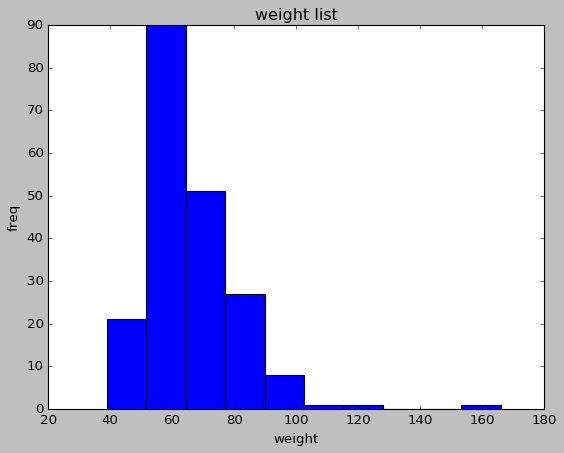

In [32]:
matplotlib.style.use('classic')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(weight_list, bins=10)
ax.set_title('weight list')
ax.set_xlabel('weight')
ax.set_ylabel('freq')

### パラメーター推定

In [33]:
param_ave = np.mean(weight_list)

In [34]:
param_sigma = np.sqrt(np.sum((weight_list - param_ave) * (weight_list - param_ave)) / len(weight_list))

In [35]:
param_ave, param_sigma

(65.799999999999997, 15.05722417977497)

In [36]:
x = np.linspace(20, 180, 100)
pdf_fitted = stats.norm.pdf(x, loc = param_ave, scale=param_sigma)

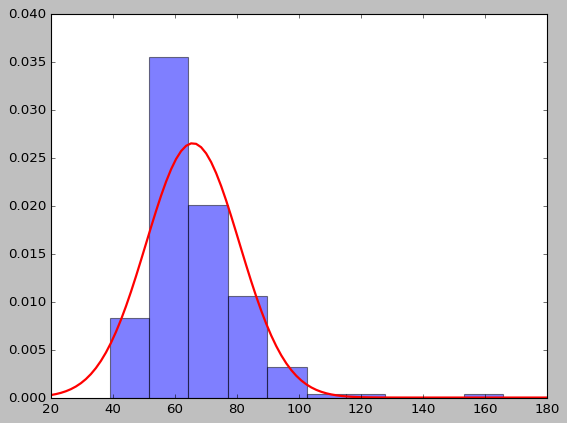

In [37]:
plt.figure(1)
plt.plot(x, pdf_fitted, 'r-', lw=2, label='norm fitted')
plt.hist(weight_list, normed = 1, alpha=0.5)
plt.show()

### 異常度の計算

In [38]:
def anomaly(x, mu, sigma):
    return ((x-mu)/sigma) ** 2

In [39]:
anomaly_list = [anomaly(x, param_ave, param_sigma) for x in weight_list]

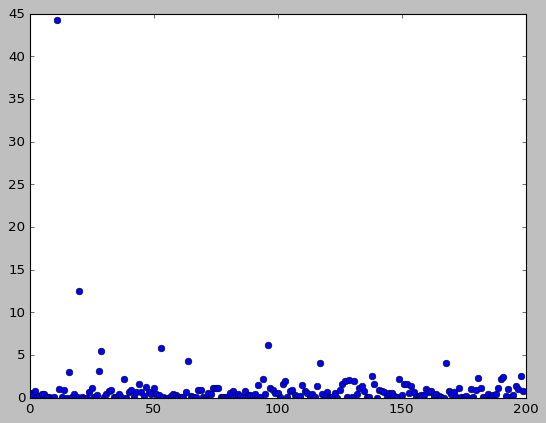

In [40]:
plt.plot(np.arange(len(anomaly_list)), anomaly_list, 'o')

### 異常度の確率分布
データ数>>1より、自由度1、スケール因子1のカイ2乗分布

In [41]:
len(anomaly_list)

200

In [42]:
y = np.linspace(0, 45, 100)
chi_fitted = stats.chi2.pdf(y, df=1, scale=1)

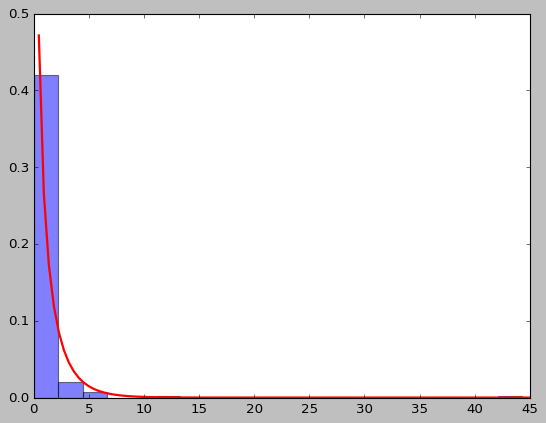

In [43]:
plt.figure(1)
plt.clf()
plt.plot(y, chi_fitted, 'r-', lw=2, label='norm fitted')
plt.hist(anomaly_list, normed = 1, bins=20, alpha=0.5)
plt.show()

### 閾値を設定(1%水準)

In [44]:
thres = stats.chi2.isf(q=0.01, df=1, scale=1)
print(thres)

6.63489660102


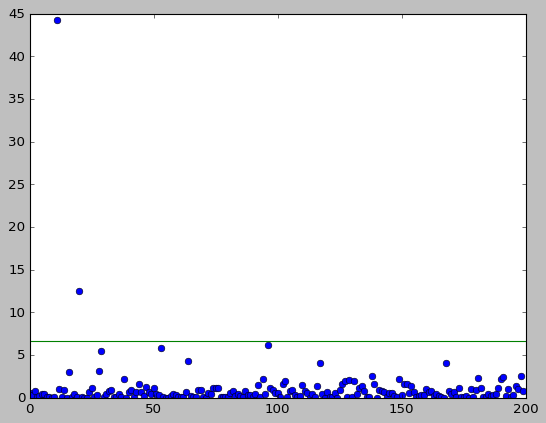

In [45]:
x = np.linspace(0, 200, 100)
y = [thres for elem in x]
plt.figure()
plt.plot(np.arange(len(anomaly_list)), anomaly_list, 'o')
plt.plot(x, y)